In [1]:
import numpy as np
import ROOT as rt
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('olmo')

from histo_utilities import create_TH1D, create_TH2D
from cebefo_style import cebefo_style
cebefo_style()

c_light = 2.99792458E8 #m/s

!cd /Users/olmo/programs/Delphes-3.4.1
rt.gSystem.Load("libDelphes");
rt.gInterpreter.Declare('#include "classes/DelphesClasses.h"');
rt.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"');

Welcome to JupyROOT 6.10/08


In [2]:
t = {}
t[0] = rt.TChain('Delphes')
t[0].Add('/Users/olmo/cernbox/PID_timing_studies/_root/gg2RHad_M500_PU0.root')

t[10] = rt.TChain('Delphes')
t[10].Add('/Users/olmo/cernbox/PID_timing_studies/_root/gg2RHad_M500_PU10.root')

t[140] = rt.TChain('Delphes')
for f in glob('/Users/olmo/cernbox/PID_timing_studies/_root/jobs_PU140_delta_fulltree/pp2RHad_M500/pp2RHad_M500_*.root'):
    t[140].Add(f)

In [4]:
branches_names = ['Event', 'Particle', 'Track','Vertex4D', 'GenVertex']

tks_names = ['Dz','Dt', 'IsPU', 'M', 'P', 'Dtof', 'beta', 'PID']
tks = {}
for k, chain in t.iteritems():
    tR = rt.ExRootTreeReader(chain)
    print tR.GetEntries()
    
    branch = {}

    for b in branches_names:
        branch[b] = tR.UseBranch(b)
        
    tks_att = []

    for i in range(tR.GetEntries()):
        tR.ReadEntry(i)

        for j in range(branch['Track'].GetEntries()):
            track = branch['Track'].At(j)
            if track.VertexIndex == -1: continue
            vtx = branch['Vertex4D'].At(track.VertexIndex)

            p = track.Particle.GetObject()

            beta = 1e-3*track.L/(c_light * track.tof_reco)

            tks_att.append((track.Z - p.Z,
                            track.T - p.T,
                            p.IsPU,
                            track.Mass,
                            track.P,
                            track.tof_reco - track.tof_gen,
                            beta,
                            p.PID))
    
    tks[k] = np.array(tks_att, dtype=zip(tks_names,['<f8']*len(tks_names)))
    print tks[k].size

10000
405160
10000
1110487
10000
12104575


Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hPU0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU140 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV140 (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/Zin_resolution.root has been created


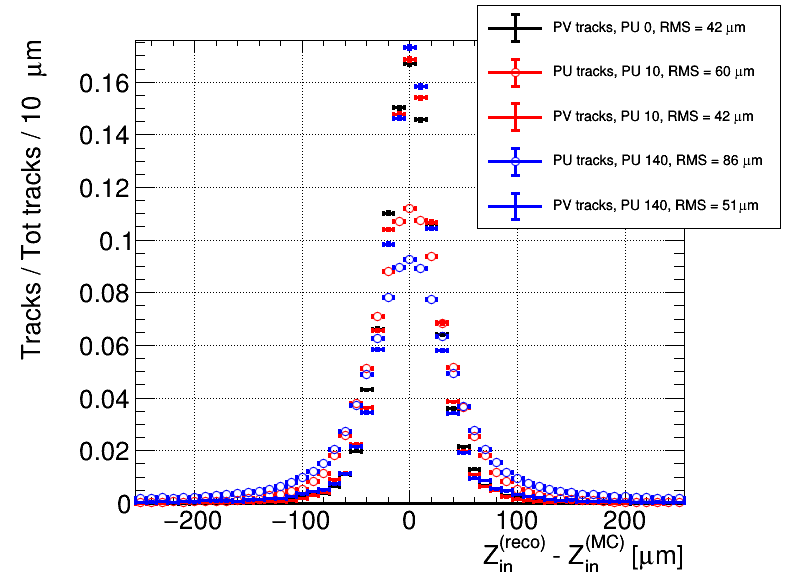

In [54]:
colors = [1,2,4]

c = rt.TCanvas('c', 'c', 800, 600)
rt.gPad.SetTopMargin(0.99)
rt.gPad.SetRightMargin(0.98)
c.histos = []

leg = rt.TLegend(0.6,0.6,0.98,0.99)

for i,k in enumerate(tks.keys()):
    
    h_PU = create_TH1D(1e3*tks[k]['Dz'][tks[k]['IsPU'] > 0.5], 'hPU'+str(k), binning = [51, -255, 255])
    h_PU.SetLineColor(colors[i])
    h_PU.SetMarkerColor(colors[i])
    h_PU.SetMarkerStyle(4)
    h_PU.SetStats(0)
    h_PU.Sumw2(0)
    h_PU.Scale(1./(1+h_PU.Integral()))
    
    h_PV = create_TH1D(1e3*tks[k]['Dz'][tks[k]['IsPU'] < 0.5], 'hPV'+str(k), binning = [51, -255, 255],
                      axis_title=['Z_{in}^{(reco)} - Z_{in}^{(MC)} [#mum]', 'Tracks / Tot tracks / {:.0f} #mum'.format(h_PU.GetBinWidth(1))]
                      )
    h_PV.SetLineColor(colors[i])
    h_PV.SetTitle('')
    h_PV.SetMarkerColor(colors[i])
    h_PV.SetMarkerStyle(1)
    h_PV.SetStats(0)
    h_PV.Sumw2(0)
    h_PV.Scale(1./(1+h_PV.Integral()))
    
    h_PV.Draw('SAMEE1')
    h_PU.Draw('SAMEE1')
    c.histos.append(h_PU)
    c.histos.append(h_PV)
    
    if k != 0: leg.AddEntry(h_PU, 'PU tracks, PU {}, RMS = {:.0f} #mum'.format(k, 1.3*h_PU.GetRMS()), 'lep')
    leg.AddEntry(h_PV, 'PV tracks, PU {}, RMS = {:.0f} #mum'.format(k, 1.3*h_PV.GetRMS()), 'lep')
        
leg.Draw()
c.Draw()
c.SaveAs('/Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/Zin_resolution.root')

6.379364556446687


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hPU0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU140 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV140 (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/Tin_resolution.root has been created


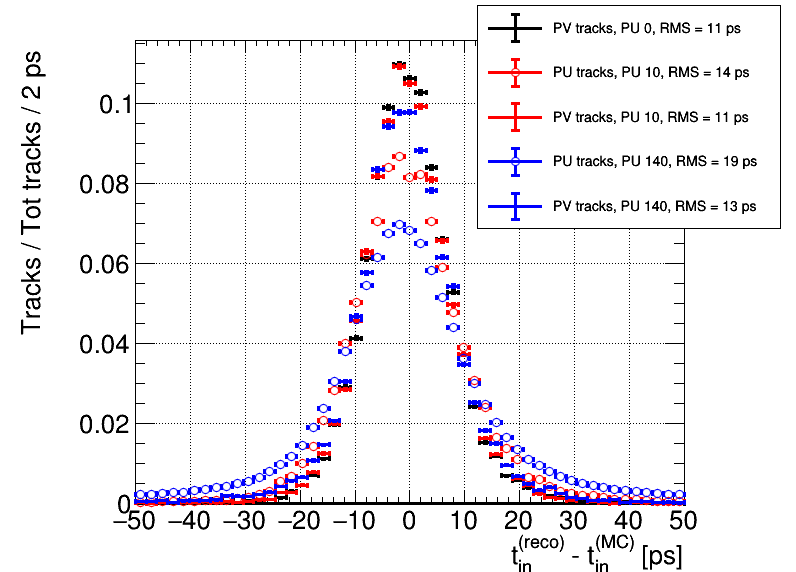

In [53]:
colors = [1,2,4]

c = rt.TCanvas('c', 'c', 800, 600)
c.histos = []

leg = rt.TLegend(0.6,0.6,0.98,0.99)

mean = np.mean(1e12*tks[0]['Dt'][tks[0]['IsPU'] < 0.5])
print mean

for i,k in enumerate(tks.keys()):
    
    h_PU = create_TH1D(1e12*tks[k]['Dt'][tks[k]['IsPU'] > 0.5] - mean, 'hPU'+str(k), binning = [51, -50, 50])
    h_PU.SetLineColor(colors[i])
    h_PU.SetMarkerColor(colors[i])
    h_PU.SetMarkerStyle(4)
    h_PU.SetStats(0)
    h_PU.Sumw2(0)
    h_PU.Scale(1./(1+h_PU.Integral()))
    
    h_PV = create_TH1D(1e12*tks[k]['Dt'][tks[k]['IsPU'] < 0.5] - mean, 'hPV'+str(k), binning = [51, -50, 50],
                      axis_title=['t_{in}^{(reco)} - t_{in}^{(MC)} [ps]', 'Tracks / Tot tracks / {:.0f} ps'.format(h_PU.GetBinWidth(1))]
                      )
    h_PV.SetLineColor(colors[i])
    h_PV.SetTitle('')
    h_PV.SetMarkerColor(colors[i])
    h_PV.SetMarkerStyle(1)
    h_PV.SetStats(0)
    h_PV.Sumw2(0)
    h_PV.Scale(1./(1+h_PV.Integral()))
    
    h_PV.Draw('SAMEE1')
    h_PU.Draw('SAMEE1')
    c.histos.append(h_PU)
    c.histos.append(h_PV)
    
    if k != 0: leg.AddEntry(h_PU, 'PU tracks, PU {}, RMS = {:.0f} ps'.format(k, 1.3*h_PU.GetRMS()), 'lep')
    leg.AddEntry(h_PV, 'PV tracks, PU {}, RMS = {:.0f} ps'.format(k, 1.3*h_PV.GetRMS()), 'lep')
        

rt.gPad.SetTopMargin(0.99)
rt.gPad.SetRightMargin(0.98)
leg.Draw()
c.Draw()
c.SaveAs('/Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/Tin_resolution.root')

-6.47306049000683


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hPU0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPU140 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPV140 (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/TOF_resolution.png has been created


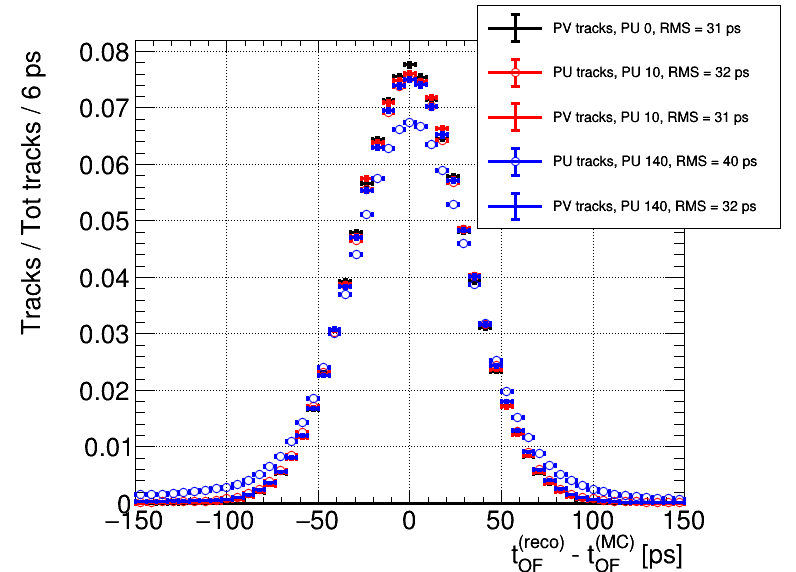

In [127]:
colors = [1,2,4]

c = rt.TCanvas('c', 'c', 800, 600)
c.histos = []

leg = rt.TLegend(0.6,0.6,0.98,0.99)

mean = np.mean(1e12*tks[0]['Dtof'][tks[0]['IsPU'] < 0.5])
print mean

for i,k in enumerate(tks.keys()):
    
    h_PU = create_TH1D(1e12*tks[k]['Dtof'][tks[k]['IsPU'] > 0.5] - mean, 'hPU'+str(k), binning = [51, -150, 150])
    h_PU.SetLineColor(colors[i])
    h_PU.SetMarkerColor(colors[i])
    h_PU.SetMarkerStyle(4)
    h_PU.SetStats(0)
    h_PU.Sumw2(0)
    h_PU.Scale(1./(1+h_PU.Integral()))
    
    h_PV = create_TH1D(1e12*tks[k]['Dtof'][tks[k]['IsPU'] < 0.5] - mean, 'hPV'+str(k), binning = [51, -150, 150],
                      axis_title=['t_{OF}^{(reco)} - t_{OF}^{(MC)} [ps]', 'Tracks / Tot tracks / {:.0f} ps'.format(h_PU.GetBinWidth(1))]
                      )
    h_PV.SetLineColor(colors[i])
    h_PV.SetTitle('')
    h_PV.SetMarkerColor(colors[i])
    h_PV.SetMarkerStyle(1)
    h_PV.SetStats(0)
    h_PV.Sumw2(0)
    h_PV.Scale(1./(1+h_PV.Integral()))
    
    h_PV.Draw('SAMEE1')
    h_PU.Draw('SAMEE1')
    c.histos.append(h_PU)
    c.histos.append(h_PV)
    
    if k != 0: leg.AddEntry(h_PU, 'PU tracks, PU {}, RMS = {:.0f} ps'.format(k, h_PU.GetRMS()), 'lep')
    leg.AddEntry(h_PV, 'PV tracks, PU {}, RMS = {:.0f} ps'.format(k, h_PV.GetRMS()), 'lep')
        

rt.gPad.SetTopMargin(0.99)
rt.gPad.SetRightMargin(0.98)
leg.Draw()
c.Draw()
c.SaveAs('/Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/TOF_resolution.png')

In [ ]:
c = rt.TCanvas('c','c',800,600)
histos = []

h = create_TH1D(dTOF[tks['IsPU']==0], name='PV', title='PV', binning = [101, -600, 600])
h.SetXTitle('TOF_{MC} - TOF_{reco} [ps]')
h.SetYTitle('Probability / {:.1f} ps'.format(h.GetBinWidth(1)))
h.Scale(1./h.Integral())
h.SetLineColor(2)
h.SetLineWidth(2)
h.DrawCopy('')

h = create_TH1D(dTOF[tks['IsPU']==1], name='PU', title='PU', binning = [101, -600, 600])
if h.Integral()>0:
    h.Scale(1./h.Integral())
h.SetLineColor(4)
h.SetLineWidth(2)
h.DrawCopy('E1same')

c.BuildLegend(0.2, 0.6,0.4,0.9)
# c.SetLogy()
# c.SetLogx()
c.Draw()

c.SaveAs('~/Desktop/TOF_resolution_sep.root')

Grafico 2D Beta vs P

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h2D (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/beta_VS_p.root has been created


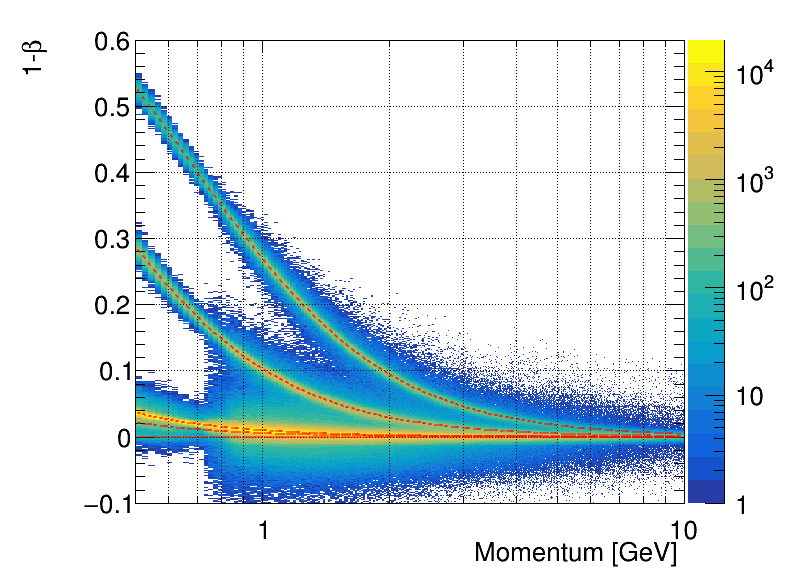

In [84]:
P_limits = [0.5, 10]

c = rt.TCanvas('c','c',800,600)

sel = np.logical_and(tks[140]['IsPU'] < 5, np.abs(np.abs(tks[140]['PID']) - 3200) > 200)
# sel = np.logical_and(sel, np.abs(tks[140]['PID'] - 411) < 1)

aux = np.column_stack((tks[140]['P'], 1 - 1e-3*tks[140]['beta']))

h2D = create_TH2D(aux[sel], 'h2D', '', binning = [500, P_limits[0], P_limits[1], 500, -0.1, 0.6])
h2D.SetYTitle('1-#beta')
h2D.SetXTitle('Momentum [GeV]')
h2D.Draw('colz')
h2D.SetStats(0)

f_par = {'pi': 0.139570**2, 'kaon': 0.493**2, 'proton': 0.938**2, 'muon': 0.105**2, 'electron': 0.000511**2, 'RHad': 500**2}
for n, m2 in f_par.items():
    f_par[n] = rt.TF1('f_'+n, '1 - x/sqrt(x*x + {})'.format(m2), P_limits[0], P_limits[1])
    f_par[n].SetLineColorAlpha(2, 0.5)
    f_par[n].SetLineStyle(7)
    f_par[n].Draw('same')

c.SetLogz()
c.SetLogx()
c.Draw()

c.SaveAs('/Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/beta_VS_p.root')

In [77]:
pid = tks[140]['PID'][sel]
already_printed = []

for x in pid:
    x = abs(x)
    if x in already_printed:
        pass
    else:
#         print x
        already_printed.append(x)
    
for x in np.sort(already_printed):
    print '{:.0f}'.format(x)

11
13
211
321
411
2212
3112
3222
3312
3334
1000612
1000632
1000652
1006211
1006213
1006223
1006321
1006323


Grafico Estimated mass

Warning in <TROOT::Append>: Replacing existing TH1: h_mass (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file /Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/reco_mass_spectrum.root has been created


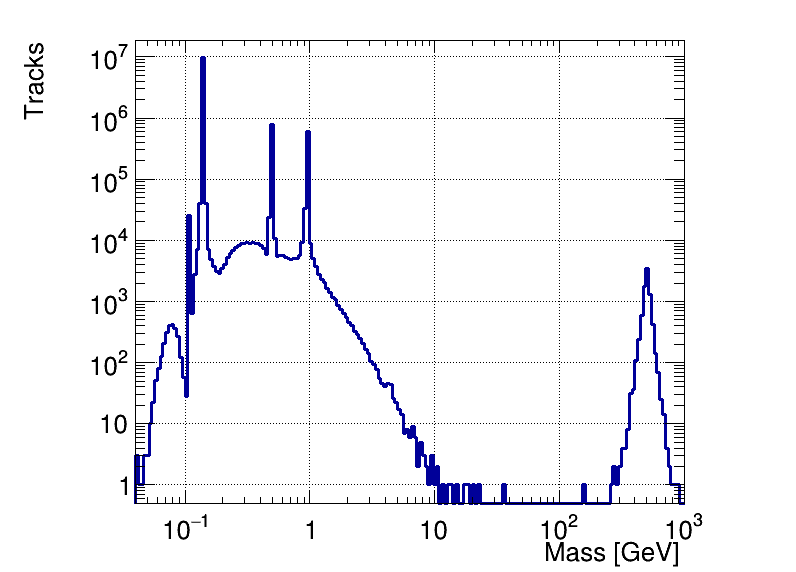

In [128]:
mass_reco = np.nan_to_num(tks[140]['M'][sel])
# print mass_reco[1:100]
xbins = np.logspace(np.log10(0.04), np.log10(1e3), 200)

h = rt.TH1F('h_mass', '', xbins.shape[0]-1, xbins)
h.SetStats(0)
# for i in range(xbins.shape[0]):
#     print h.GetBinCenter(i)

for m in mass_reco:
    h.Fill(m)
    
# print mass_reco.min()
# print mass_reco.max()
# plt.hist(mass_reco, bins=xbins)

h.SetXTitle('Mass [GeV]')
h.SetYTitle('Tracks')


c = rt.TCanvas('c','c',800,600)
h.Draw()
c.SetLogy()
c.SetLogx()
c.Draw()

c.SaveAs('/Users/olmo/cernbox/PID_timing_studies/_fig/paper_root/reco_mass_spectrum.root')